In [1]:
%config IPCompleter.greedy = True

import pymysql as psql

import pandas as pd
from pandas import *
from seaborn import *
from matplotlib.pyplot import *
import networkx as nx

import numpy as np
from statsmodels.formula.api import *
%matplotlib inline 

pd.options.display.max_columns = None
pd.options.display.max_seq_items = None
np.set_printoptions(threshold=np.inf)

In [2]:
# Conjunto de Dados com os Alunos Formados

conn=psql.connect(host="localhost", user="uffdata", passwd="uffdata123", db="dwebd152")
df = read_sql('''   SELECT A.IDALUNO, C.NOME as CURSO, H.CODDISCIPLINA, H.NOTADISCIPLINA from BI_DMALUNO A
                    INNER JOIN BI_FATOHISTORICO H ON H.CODALUNO = A.IDALUNO
                    INNER JOIN BI_DMCURSO C ON C.IDCURSO = H.CODCURSO
                    WHERE A.CODSITUACAOALUNO=0 && (A.CODSTATUSALUNO=8 || A.CODSTATUSALUNO=21);''', conn)

print('Números de registros:', len(df))
conn.close

Números de registros: 296355


<bound method Connection.close of <pymysql.connections.Connection object at 0x11203be80>>

In [3]:
dfmat = df[df.CURSO == 'MATEMÁTICA']
dfmat[dfmat.NOTADISCIPLINA > 80]

dfaluno = dfmat[dfmat.IDALUNO == dfmat.iloc[0].IDALUNO]

In [4]:
G = nx.Graph()

In [5]:
for i in range(len(dfaluno)):
    G.add_node(dfaluno.iloc[i].CURSO)
    G.add_node(dfaluno.iloc[i].IDALUNO)
    G.add_edge(dfaluno.iloc[i].CURSO,dfmat.iloc[i].IDALUNO)

/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


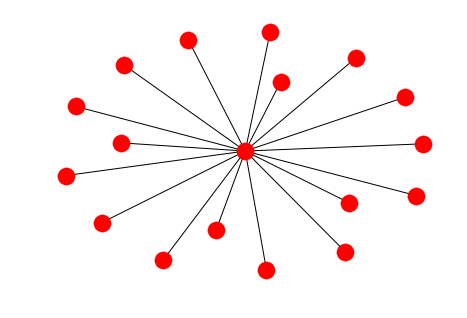

In [6]:
nx.draw(G)